<a href="https://colab.research.google.com/github/urfa10/MSIB_Data-Science/blob/main/MSIB_Case_Cluestering_data_Asuransi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##BUSINES UNDERSTANDING
Objective:

1. Menemukan kelompok nasabah untuk menenukan Risiko serangan jantaung koroner

Segmentasi Nasabah Asuransi kesehatan untuk menukan tingkat Risiko jantung koroner dengan pendekatan Sains Data

Permasalah : Unsupervised learning
Algoritma : K-mEans Clustering evaluasi Elbow Method



In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [ ]:
#import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Data
path='/content/drive/MyDrive/Colab Notebooks/DataSource/Chapter06DataSet.csv'
#Load data from drive
load_data_res = pd.read_csv(path)
#membentuk data frame
df=pd.DataFrame(load_data_res)
df.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [ ]:
df.isnull().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

In [ ]:
df.isna().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

##Data Preparation
1. Tidak ada Join antar tabel, emua field sudah di cover satu tabel
2. Tidak ada handling missing alue, disesbabkan tidak ada null value dan nana value

## Pemodelan data menggunakan Clustering

In [ ]:
from sklearn.cluster import KMeans
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Mentukan Input Variabel

x=df[['Weight',	'Cholesterol',	'Gender']]
#Karena unsupervised learning tidak ada variabel target

#Elbow Method
Suatu mentode untuk menentukan nilai n cluster, sehingga cluster tersebut optimal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

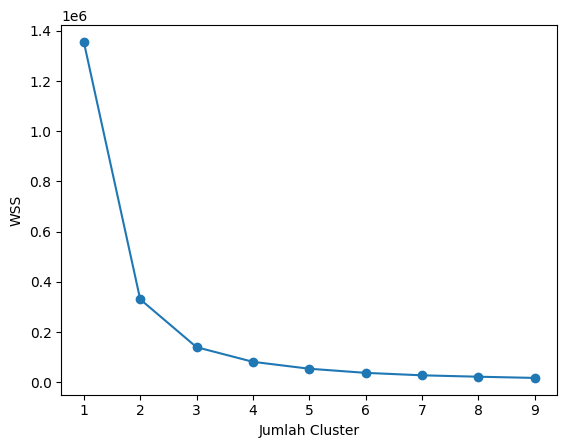

In [ ]:
cluster_range=range(1,10)

cluster_wss=[]

for num_cluster in cluster_range:
  clusters=KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range,cluster_wss, marker='o')
plt.show()

##Hasil analisis ELBOW

Ditemukan garis lengkung ELBOW berada pada titik 2 kemudian melandai diangka 3 dan landai kembali di angka 4

Bisa disimpulkan bahwa nilai n cluster optimum pada nilai 3 s.d 4

In [ ]:
#Menetukan kongfigurasi KMeans pada model
cls=KMeans(n_clusters=4,random_state=0)
#Membentuk Model
model_cls=cls.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster']=model_cls.labels_

In [ ]:
df.head()

,Weight,Cholesterol,Gender,cluster
0,102,111,1,1
1,115,135,1,1
2,115,136,1,1
3,140,167,0,2
4,130,158,1,2


In [ ]:
from google.colab import files
#Menimpan File/Export File to Local computer output CSV file
df.to_excel('df_cluster.xlsx')
files.download('df_cluster.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Hasil Cluster
Ada 4 Cluster dimana data tersebut menunjukkan
1. Cluster 0 adalah critical cluster
2. Cluster 1 adalah nasabah asuransi dalam keadaan aman (Low Risk)
3. Cluster 2 adalah medium risk
4. Cluster 3 adalah high risk